In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm

In [6]:
# load testListing into pandas and removing columns that expected, other formalities 
testlisting_file_path = "C:/Users/kasun/Desktop/Data Analytics/Final Project/Original Documents/testListings.csv"

# Specify the dtype for columns that have mixed types (e.g., column 0 and 4)
df_testlisting = pd.read_csv(testlisting_file_path,on_bad_lines='skip')

In [7]:
# load trainListing into pandas and removing columns that expected, other formalities 
trainlisting_file_path = "C:/Users/kasun/Desktop/Data Analytics/Final Project/Original Documents/trainListings.csv"
df_trainlisting = pd.read_csv(trainlisting_file_path, on_bad_lines='skip', dtype={0: str, 4: str}, low_memory=False)


In [8]:
# join two tables because both df_testlisting and df_trainlisting have same columns
df_concat_test_train_listing = pd.concat([df_testlisting, df_trainlisting], ignore_index=True)

In [9]:
#calculate the null values for each column
print(df_concat_test_train_listing.isnull().sum())

id                 0
sourceId           2
locationId         9
typeId             2
price           7878
rooms          94317
bedrooms       16216
bathrooms      18698
totalArea      33274
livingArea     65926
plotArea       49033
terraceArea    83415
title           5483
description     3560
features       51664
latitude       84882
longitude      85171
thumbnails         4
dtype: int64


In [10]:
# remove unwated and unclear columns from the dataset and save as a new excel called, 'df_concat_remove_columns_listing'
columns_to_remove = ['title','description','features','latitude','longitude','thumbnails']
File1_concat_remove_columns = df_concat_test_train_listing.drop(columns=columns_to_remove)

File1_concat_remove_columns.to_excel('File1_concat_remove_columns_listing.xlsx', index=False)

In [11]:
File1_concat_remove_columns.describe()

,sourceId,locationId,typeId,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea
count,105040.000000,105033.000000,105040.000000,10725.000000,8.882600e+04,86344.000000,71768.000000,39116.000000,5.600900e+04,2.162700e+04
mean,136.424629,161.220520,6.102538,4.699860,8.017582e+01,3.071933,351.547305,350.969450,2.611961e+04,2.126085e+02
std,129.934344,169.511228,3.960919,3.704399,2.271971e+04,7.286681,2891.706262,5455.160421,5.039973e+05,1.605198e+04
min,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,8.000000,1.000000,6.000000e+00,1.000000e+00
25%,14.000000,30.000000,1.000000,3.000000,3.000000e+00,2.000000,120.000000,110.000000,6.800000e+02,2.000000e+01
50%,82.000000,85.000000,7.000000,4.000000,3.000000e+00,2.000000,212.000000,196.000000,1.377000e+03,5.000000e+01
75%,280.000000,251.000000,10.000000,6.000000,5.000000e+00,4.000000,391.000000,362.000000,5.700000e+03,1.070000e+02
max,367.000000,863.000000,18.000000,265.000000,6.771314e+06,1314.000000,544060.000000,884250.000000,8.400000e+07,2.341400e+06


In [12]:
print(File1_concat_remove_columns.dtypes)

id              object
sourceId       float64
locationId     float64
typeId         float64
price           object
rooms          float64
bedrooms       float64
bathrooms      float64
totalArea      float64
livingArea     float64
plotArea       float64
terraceArea    float64
dtype: object


In [13]:
# checking the columns which contain unique values (no duplicates). then we can start based on that

total_rows = len(File1_concat_remove_columns)

unique_columns = [i for i in File1_concat_remove_columns.columns if File1_concat_remove_columns[i].nunique() == total_rows]

print("Columns with unique values: ", unique_columns)

Columns with unique values:  ['id']


In [14]:
# assuming values of id column are numeric and checking whether if there is non-numeric values
# Convert to numeric, set errors='coerce' to turn non-numeric values into NaN
File1_concat_remove_columns['id_numeric'] = pd.to_numeric(File1_concat_remove_columns['id'], errors='coerce')

# Find rows where 'id_numeric' is NaN (i.e., where 'id' contains non-numeric values)
non_numeric_values = File1_concat_remove_columns[File1_concat_remove_columns['id_numeric'].isna()]

print("Rows with Non-Numeric Values:")
print(non_numeric_values)

Rows with Non-Numeric Values:
                                                      id  sourceId  \
64067  Sonderwünsche können je nach Bautenstand berüc...       NaN   
80139                 Der Energieausweis ist beantragt."       NaN   

       locationId   typeId                                              price  \
64067     54.9311  8.32400  745240,745241,745242,745243,745244,745245,7452...   
80139     54.9029  8.30846  1019564,1019565,1019566,1019567,1019568,101956...   

       rooms  bedrooms  bathrooms  totalArea  livingArea  plotArea  \
64067    NaN       NaN        NaN        NaN         NaN       NaN   
80139    NaN       NaN        NaN        NaN         NaN       NaN   

       terraceArea  id_numeric  
64067          NaN         NaN  
80139          NaN         NaN  


In [15]:
# in above lines, source id is null. every id should have a source id. So can remove those rows


# Remove rows where 'id_numeric' is NaN
concat_remove_columns_rows = File1_concat_remove_columns.dropna(subset=['id_numeric'])

# Drop the 'id_numeric' column
File2_concat_remove_columns_rows = concat_remove_columns_rows.drop(columns=['id_numeric'])

File2_concat_remove_columns_rows.to_excel('File2_concat_remove_columns_rows.xlsx', index=False)

In [16]:
# remove rows that price values are empty

File3_concat_remove_columns_rows_price = File2_concat_remove_columns_rows.dropna(subset=['price'])

File3_concat_remove_columns_rows_price.to_excel('File3_concat_remove_columns_rows_price.xlsx', index=False)

In [17]:
# Analysing houses and apartments so creating a new file only with houses and apartments

house_apartment_types = [1,2,3,4,5,6,7,9,10,12]

File4_houses_apartments = File3_concat_remove_columns_rows_price[File3_concat_remove_columns_rows_price['typeId'].isin(house_apartment_types)]

File4_houses_apartments.to_excel('File4_houses_apartments.xlsx', index=False)


In [18]:
# remove columns - rooms, living area, plot area, terrace area

columns_to_remove2 = ['rooms', 'livingArea', 'plotArea', 'terraceArea']

File5_houses_apartmens_remove_columns = File4_houses_apartments.drop(columns=columns_to_remove2)

File5_houses_apartmens_remove_columns.to_excel('File5_houses_apartmens_remove_columns.xlsx', index=False)

In [19]:
File5_houses_apartmens_remove_columns.describe()

,sourceId,locationId,typeId,bedrooms,bathrooms,totalArea
count,87704.000000,87696.000000,87704.000000,80820.000000,78390.000000,64347.000000
mean,136.302415,164.873358,5.612606,3.726491,2.890573,314.976021
std,130.445111,173.083481,3.753915,2.580766,2.375307,1640.123146
min,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
25%,14.000000,30.000000,1.000000,3.000000,2.000000,120.000000
50%,82.000000,85.000000,5.000000,3.000000,2.000000,205.000000
75%,282.000000,279.000000,10.000000,4.000000,4.000000,375.000000
max,367.000000,863.000000,12.000000,400.000000,400.000000,340900.000000


In [20]:
File5_houses_apartmens_remove_columns['bathrooms'] = File5_houses_apartmens_remove_columns['bathrooms'].fillna(0)
File5_houses_apartmens_remove_columns['bedrooms'] = File5_houses_apartmens_remove_columns['bedrooms'].fillna(0)
File5_houses_apartmens_remove_columns['totalArea'] = File5_houses_apartmens_remove_columns['totalArea'].fillna(0)

In [21]:
print("Zero bedrooms",File5_houses_apartmens_remove_columns['bedrooms'].value_counts()[0])
print("Zero bathrooms",File5_houses_apartmens_remove_columns['bathrooms'].value_counts()[0])
print("Zero total areas", File5_houses_apartmens_remove_columns['totalArea'].value_counts()[0])

Zero bedrooms 6884
Zero bathrooms 9314
Zero total areas 23357


In [22]:
File6_houses_apartments_remove_zeros = File5_houses_apartmens_remove_columns[~((File5_houses_apartmens_remove_columns['bedrooms']==0) | 
                        (File5_houses_apartmens_remove_columns['bathrooms']==0) | (File5_houses_apartmens_remove_columns['totalArea']==0))]

File6_houses_apartments_remove_zeros.to_excel('File6_houses_apartments_remove_zeros.xlsx',index=False)

In [23]:
bedrooms_avarage = File6_houses_apartments_remove_zeros['bedrooms'].mean()
print(bedrooms_avarage)

3.746216974271962


In [24]:
# Set the threshold for the number of bathrooms
threshold2 = 10

# Filter out rows where number of bathrooms is greater than the threshold
File7_houses_apartments_less10_bedrooms_bathrooms= File6_houses_apartments_remove_zeros[File6_houses_apartments_remove_zeros['bathrooms'] <= threshold2]

# File7_houses_apartments_less10_bedrooms_bathrooms.to_excel('File7_houses_apartments_less10_bedrooms_bathrooms.xlsx', index=False)

In [25]:
# Set the threshold for the number of bedrooms
threshold1 = 10

# Filter out rows where number of bedrooms is greater than the threshold
File7_houses_apartments_less10_bedrooms_bathrooms = File7_houses_apartments_less10_bedrooms_bathrooms[File7_houses_apartments_less10_bedrooms_bathrooms['bedrooms'] <= threshold1]

File7_houses_apartments_less10_bedrooms_bathrooms.to_excel('File7_houses_apartments_less10_bedrooms_bathrooms.xlsx', index=False)

In [26]:
# check the maximum 10 values of total area

top_10_values = File7_houses_apartments_less10_bedrooms_bathrooms['totalArea'].nlargest(20)
print(top_10_values)

94671    340900.0
78005    150000.0
159       76891.0
58195     55000.0
75872     47900.0
51319     22000.0
44506     16815.0
47582     15800.0
82054     13500.0
5904       9000.0
24154      9000.0
76034      7103.0
77806      7000.0
64114      6911.0
31873      6732.0
55690      6000.0
40819      5852.0
38208      5500.0
23378      5000.0
8384       4950.0
Name: totalArea, dtype: float64


In [27]:
# remove areas from total area which is great than 999

File8_houses_apartments_remove_totalarea = File7_houses_apartments_less10_bedrooms_bathrooms[File7_houses_apartments_less10_bedrooms_bathrooms['totalArea']<=999]

File8_houses_apartments_remove_totalarea.to_excel('File8_houses_apartments_remove_totalarea.xlsx', index=False)

In [28]:
# remove locations which are empty

File9_houses_apartments_empty_locations = File8_houses_apartments_remove_totalarea.dropna(subset=['locationId'])

File9_houses_apartments_empty_locations.to_excel('File9_houses_apartments_empty_locations.xlsx', index=False)

In [29]:
print(File9_houses_apartments_empty_locations.dtypes)

id             object
sourceId      float64
locationId    float64
typeId        float64
price          object
bedrooms      float64
bathrooms     float64
totalArea     float64
dtype: object


In [30]:
# convert data type of price to float

File9_houses_apartments_empty_locations_copy1 = File9_houses_apartments_empty_locations.copy()

File9_houses_apartments_empty_locations_copy1['price'] = pd.to_numeric(File9_houses_apartments_empty_locations_copy1['price'], errors='coerce')

print(File9_houses_apartments_empty_locations_copy1['price'].dtype)

float64


In [31]:
File9_houses_apartments_empty_locations_copy1.to_excel('File10_houses_apartments_final_version.xlsx', index=False)

Coefficient (slope): 491243.5783506034
Intercept: -605828.3728990592


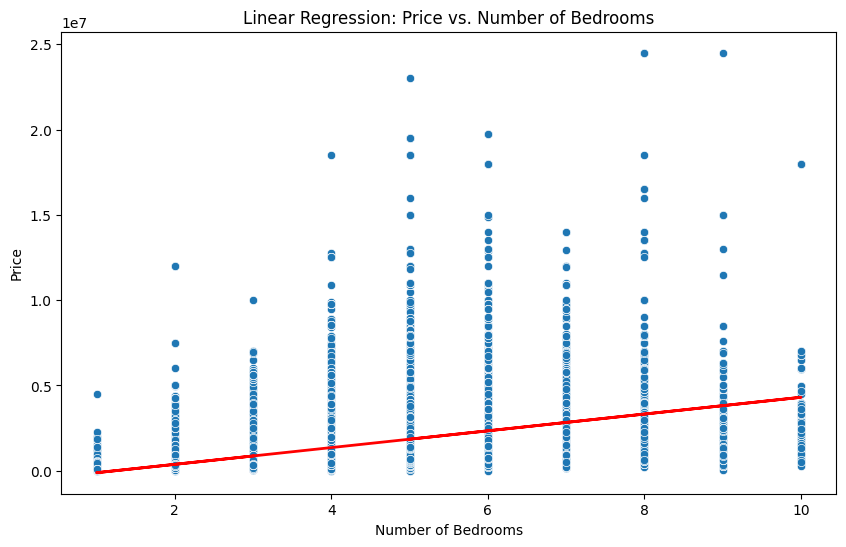

In [32]:
from sklearn.linear_model import LinearRegression

# Reshape the data for the model
X = File9_houses_apartments_empty_locations_copy1[['bedrooms']]
y = File9_houses_apartments_empty_locations_copy1['price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficient and intercept
print(f'Coefficient (slope): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=File9_houses_apartments_empty_locations_copy1['bedrooms'], y=File9_houses_apartments_empty_locations_copy1['price'])
plt.plot(File9_houses_apartments_empty_locations_copy1['bedrooms'], model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


In [33]:
# OLS Regression Results

# Define the independent variable (number of bedrooms) and dependent variable (price)
X = File9_houses_apartments_empty_locations_copy1['bedrooms']  # independent variable
y = File9_houses_apartments_empty_locations_copy1['price']  # dependent variable

# Add a constant to the independent variable (required for OLS)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Get the OLS regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                 1.802e+04
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:18:38   Log-Likelihood:            -8.6684e+05
No. Observations:               56089   AIC:                         1.734e+06
Df Residuals:                   56087   BIC:                         1.734e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.058e+05   1.42e+04    -42.618      0.0

In [34]:
# Define independent variables and add a constant for the intercept
X = File9_houses_apartments_empty_locations_copy1[['bedrooms', 'bathrooms', 'totalArea']]
X = sm.add_constant(X)

# Define the dependent variable
y = File9_houses_apartments_empty_locations_copy1['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print out the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 2.117e+04
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:18:38   Log-Likelihood:            -8.5342e+05
No. Observations:               56089   AIC:                         1.707e+06
Df Residuals:                   56085   BIC:                         1.707e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.44e+05   1.15e+04    -29.793      0.0